# **MITHA AMALIA**
### **2009106028**
### **POSTTEST 8 KB**

# Import Library

In [16]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,optimizers,datasets
import matplotlib.pyplot as plt
import numpy as np

# **LOAD DATASET**

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# **ENCODING LABEL**

In [3]:
num_class = 10

#One Hot Encoding
y_train = keras.utils.to_categorical(y_train,num_class)
y_test = keras.utils.to_categorical(y_test,num_class)

In [4]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# **TAMPILKAN DATASET**

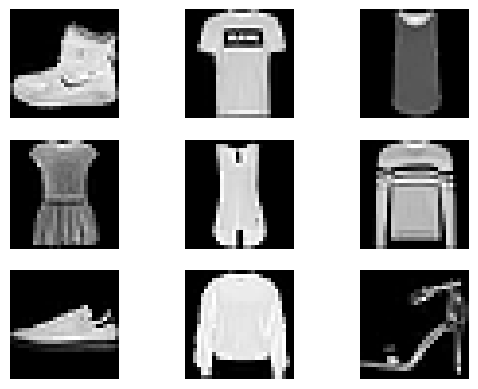

In [5]:
plt.figure
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[i],cmap='gray')
  plt.axis('off')

plt.show()

# **RESHAPE GAMBAR**

In [6]:
x_train = X_train.reshape(60000,784)
x_test = X_test.reshape(10000,784)

# **NORMALISASI**

In [7]:
#Normalize image pixel values.
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

# **BUAT MODEL**

In [8]:
model_data = keras.Sequential()

In [9]:
#Input Layer
model_data.add(layers.Dense(512,activation='relu',input_dim=784))

#Hidden Layer
model_data.add(layers.Dense(256,activation='relu'))
model_data.add(layers.Dense(128,activation='relu'))

#Output Layer
model_data.add(layers.Dense(10,activation='softmax'))

In [10]:
model_data.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


# **COMPILE MODEL**

In [11]:
Optimizer = optimizers.Adam(learning_rate=0.0001)

model_data.compile(loss=keras.losses.categorical_crossentropy,optimizer=Optimizer,
                    metrics=['accuracy'])

# **TRAINING MODEL**

In [12]:
history = model_data.fit(x_train,y_train,epochs=20,batch_size=128,verbose=1,validation_data=(x_test,y_test))

Epoch 1/20
469/469 [==============================] - 9s 12ms/step - loss: 0.6587 - accuracy: 0.7878 - val_loss: 0.4682 - val_accuracy: 0.8351
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.4204 - accuracy: 0.8524 - val_loss: 0.4226 - val_accuracy: 0.8505
Epoch 3/20
469/469 [==============================] - 6s 12ms/step - loss: 0.3769 - accuracy: 0.8676 - val_loss: 0.4170 - val_accuracy: 0.8483
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 0.3505 - accuracy: 0.8758 - val_loss: 0.3885 - val_accuracy: 0.8606
Epoch 5/20
469/469 [==============================] - 6s 12ms/step - loss: 0.3306 - accuracy: 0.8817 - val_loss: 0.3851 - val_accuracy: 0.8607
Epoch 6/20
469/469 [==============================] - 6s 12ms/step - loss: 0.3143 - accuracy: 0.8868 - val_loss: 0.3605 - val_accuracy: 0.8704
Epoch 7/20
469/469 [==============================] - 6s 12ms/step - loss: 0.2989 - accuracy: 0.8917 - val_loss: 0.3696 - val_accuracy: 0.8676

# **EVALUATE MODEL**

In [13]:
score = model_data.evaluate(x_test,y_test,verbose=1)
print(f'Test Loss    : {score[0]}')
print(f'Test Akurasi : {round(score[1] * 100,2)} %')

313/313 [==============================] - 1s 4ms/step - loss: 0.3213 - accuracy: 0.8871
Test Loss    : 0.32126185297966003
Test Akurasi : 88.71 %


# **PREDIKSI MODEL**

In [14]:
predictions = model_data.predict(x_test)

313/313 [==============================] - 1s 4ms/step


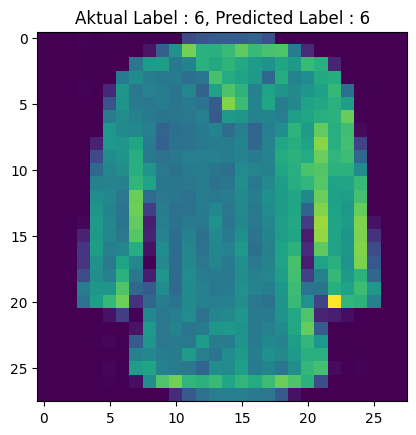

In [17]:
label = np.argmax(predictions,axis=1)
ActualLabel = np.argmax(y_test[4])



img = x_test[4].reshape(28, 28)

plt.title(f"Aktual Label : {ActualLabel}, Predicted Label : {label[4]}")

plt.imshow(img)
plt.show()

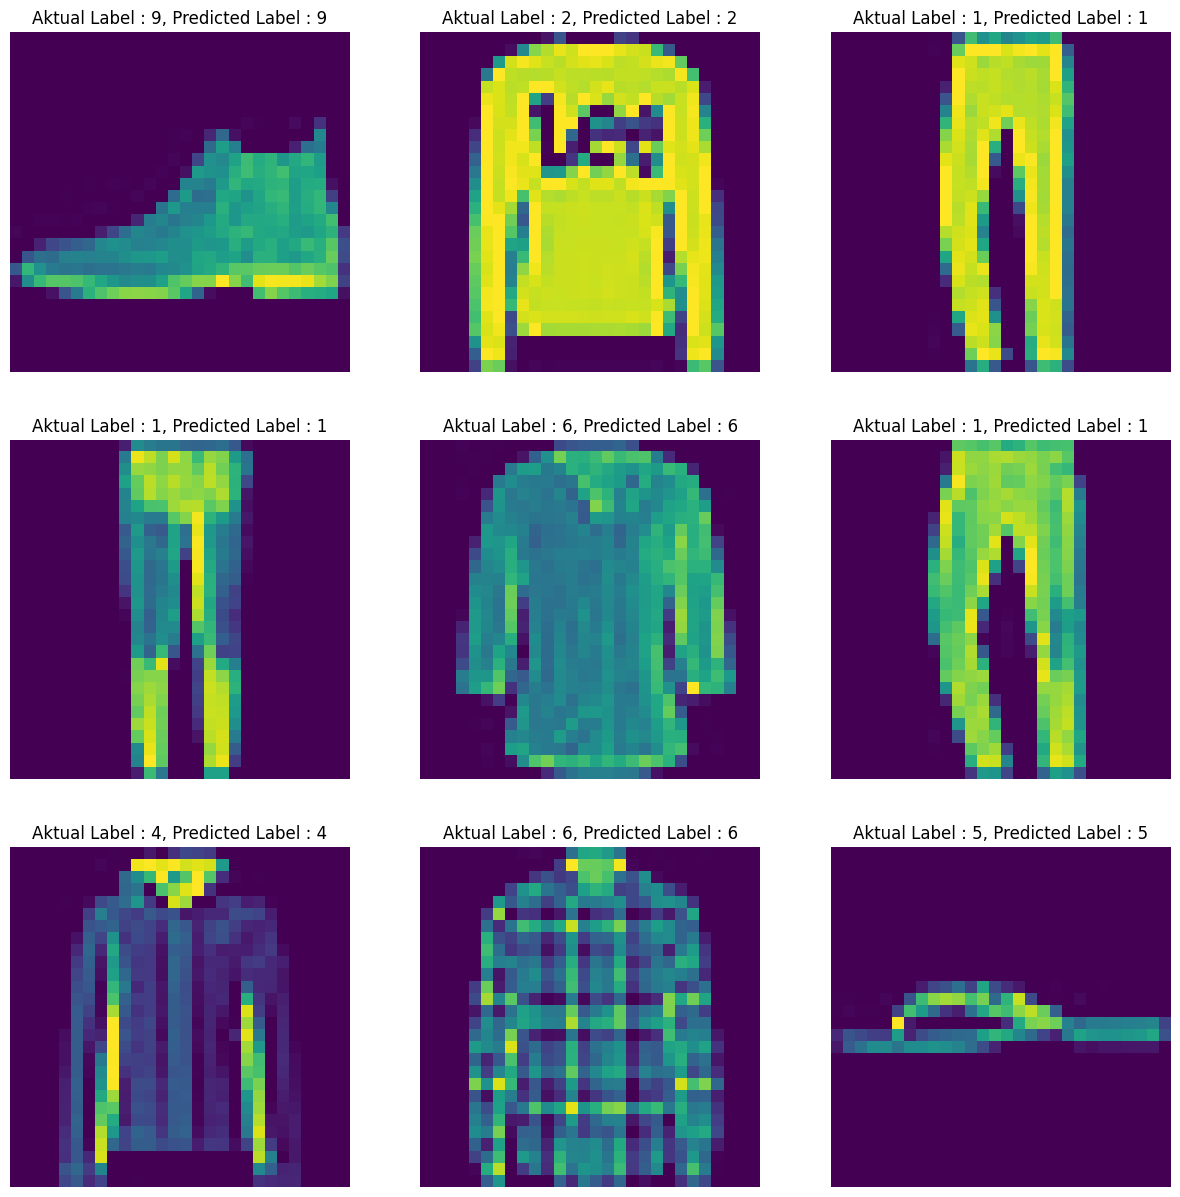

In [18]:
plt.figure(figsize=(15,15))
for i in range(9):
  plt.subplot(3,3,i+1)


  ActualLabel = np.argmax(y_test[i])
  plt.title(f"Aktual Label : {ActualLabel}, Predicted Label : {label[i]}")
  plt.imshow(x_test[i].reshape(28, 28))
  plt.axis('off')

plt.show()